In [3]:
import numpy as np
from numba import njit, jit
import matplotlib.pyplot as plt
import time

@njit
    @jit(nopython=True)
@jit
    decorator, marks for optimization
nopython
    prevents error raising
object
    alternative to nopython, much faster
nogil
    releases global interpreter lock
cache
    write the result to a file based cache
parallel
    enables parallelization for supported operations
@generated_jit
    alternative to @jit for picking specialized funciton on input types.
@stencil:
    Deals with array elements and fixed patterns


In [4]:
#Source: https://financeformulas.net/Future_Value_of_Annuity.html
#When lost: https://numba.pydata.org/numba-doc/latest/user/5minguide.html
def apy(r,n):
    return -1+(1+ r/n)**n

In [5]:
#Fastmath makes it faster, but parallel slows the function down.
@jit(fastmath=True)
def apy2(r,n):
    return -1+(1+ r/n)**n

In [154]:
#Given a function that takes two inputs measure the amount of time it 
# takes to run 10, 100, and 1000 times and print results out.
def counter_1(func, *argv):
    k = 10
    ret_arr = []
    for j in range(5):
        start = time.process_time()
        for i in range(k):
            func(argv[0])
        ret_arr.append(time.process_time() - start)
        k*=10
    return ret_arr

def counter_2(func, *argv):
    k = 10
    ret_arr = []
    for j in range(5):
        start = time.process_time()
        for i in range(k):
            func(argv[0],argv[1])
        ret_arr.append(time.process_time() - start)
        k*=10
    return ret_arr


def counter_3(func, *argv):
    k = 10
    ret_arr = []
    for j in range(5):
        start = time.process_time()
        for i in range(k):
            func(argv[0],argv[1],argv[2])
        ret_arr.append(time.process_time() - start)
        k*=10
    return ret_arr

In [155]:
# var_num = .123456
var_num = 3
regular_apy = counter_2(apy, var_num, var_num)
jit_apy = counter_2(apy2, var_num, var_num)

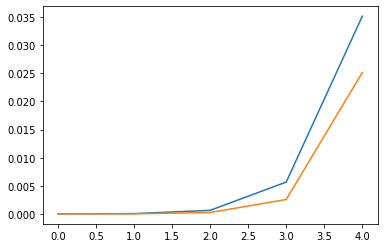

In [156]:
plt.plot(regular_apy)
plt.plot(jit_apy)
plt.show()

Fastmath gives a decent speedup, but nothing crazy.

In [157]:
def FV_annu(P, r, n):
    for i in range(100):
        l = P*(-1+(1+r)**n)/r

In [158]:
@njit#(cache=True, fastmath=True)
def FV_annu2(P, r, n):
    for i in range(100):
        l = P*(-1+(1+r)**n)/r

In [159]:
var_num = .123456
regular_apy = counter_3(FV_annu, var_num, var_num, var_num)
jit_apy = counter_3(FV_annu2, var_num, var_num, var_num)


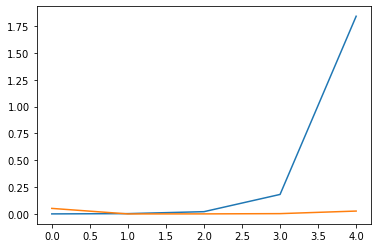

In [160]:
plt.plot(regular_apy)
plt.plot(jit_apy)
plt.show()

So with a loop we can see that the function is taking constant time.

In [167]:
def func( x ): 
    return x * x * x - x * x + 2

def derivFunc( x ): 
    return 3 * x * x - 2 * x

def newtonRaphson( x ): 
    h = func(x) / derivFunc(x) 
    while abs(h) >= 0.0001: 
        h = func(x)/derivFunc(x) 
        x = x - h 
    return x
@jit(fastmath=True)
def newtonRaphson2( x ): 
    h = (x * x * x - x * x + 2)/(3 * x * x - 2 * x) 
    while abs(h) >= 0.0001: 
        h = (x * x * x - x * x + 2)/(3 * x * x - 2 * x) 
        x = x - h 
    return x
newtonRaphson(-.123456)

-1.0000000000592966

In [170]:
var_num = .123456
regular_apy = counter_1(newtonRaphson, var_num)
jit_apy = counter_1(newtonRaphson2, var_num)


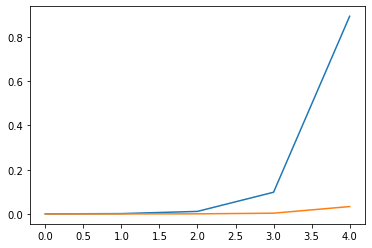

In [171]:
plt.plot(regular_apy)
plt.plot(jit_apy)
plt.show()

The newtonRaphson stuff was copied from 'https://www.geeksforgeeks.org/program-for-newton-raphson-method/'. By the third tick the compilation phase in the first tick has paid for itself. Why bother with vectorization and numpy?
I wish you could start compilation in a separate parallel thread so you can avoid some of the first tick cost.